# DNN 으로 예측해보기

- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

- 참고 노트북
    - https://www.kaggle.com/code/umbertogriffo/deep-learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_path = "../data/benz"
train = pd.read_csv(f'{base_path}/train.csv.zip', index_col="ID")
test = pd.read_csv(f'{base_path}/test.csv.zip', index_col="ID")
submission = pd.read_csv(f'{base_path}/sample_submission.csv.zip', index_col="ID")

train.shape, test.shape, submission.shape

((4209, 377), (4209, 376), (4209, 1))

In [4]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


### 예측값에 log 트랜스폼 해주기

<AxesSubplot:>

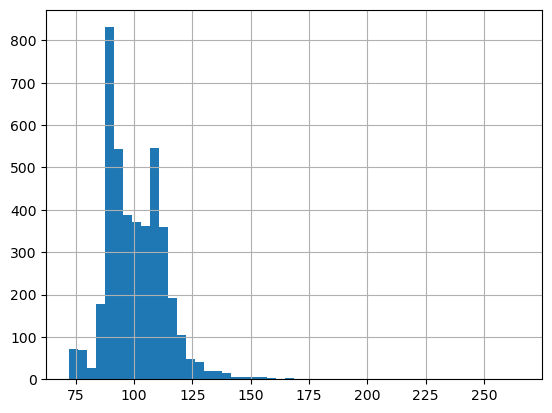

In [16]:
train["y"].hist(bins=50)

In [19]:
train["logy"] = np.log(train["y"])

<AxesSubplot:>

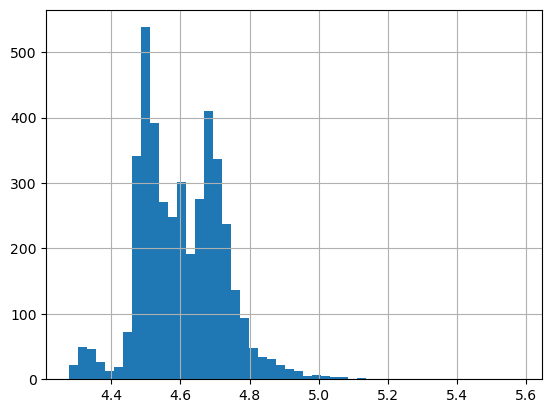

In [20]:
train["logy"].hist(bins=50)

### zero 만 있는 컬럼은 삭제

In [28]:
zero_columns = train.sum()[train.sum() == 0].index.tolist()
zero_columns

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [31]:
train = train.drop(columns=zero_columns)
test = test.drop(columns=zero_columns)

train.shape, test.shape

((4209, 366), (4209, 364))

### One-hot-Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", handle_unknown="ignore")
ohe

OneHotEncoder(drop='first', handle_unknown='ignore')

In [46]:
cat_col = train.describe(include="O").columns.tolist()
cat_col

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [48]:
num_col = train.describe().columns.tolist()
num_col.remove("y")
num_col.remove("logy")
num_col[:2]

['X10', 'X12']

In [63]:
train.index

Int64Index([   0,    6,    7,    9,   13,   18,   24,   25,   27,   30,
            ...
            8395, 8397, 8399, 8402, 8403, 8405, 8406, 8412, 8415, 8417],
           dtype='int64', name='ID', length=4209)

In [64]:
train_ohe = ohe.fit_transform(train[cat_col]).toarray()
train_ohe = pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())
print(train_ohe.shape)
train_ohe = train_ohe.set_index(train.index)
train_ohe.head()

(4209, 187)


,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
test_ohe = ohe.transform(test[cat_col]).toarray()
test_ohe = pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out())
test_ohe = test_ohe.set_index(test.index)
print(test_ohe.shape)
test_ohe.head()

(4209, 187)


c:\Users\chjy1\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 수치형컬럼과 합치기

In [72]:
X = pd.concat([train_ohe, train[num_col]], axis=1)

In [69]:
X_test = pd.concat([test_ohe, test[num_col]], axis=1)
X_test

,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### 데이터 나누기

In [70]:
y = train["logy"]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3367, 543), (842, 543), (3367,), (842,))

In [74]:
input_shape = X_train.shape[1]
input_shape

543

In [76]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [148]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1024, input_shape=[input_shape]))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation="selu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation="selu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation="selu"))
model.add(tf.keras.layers.Dense(1))
model._name = "Space_NN"
model.summary()

Model: "Space_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1024)              557056    
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                                 
 dense_29 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_30 (Dense)            (None, 512)               524800    
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               656

In [161]:
from keras import backend as K
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [162]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss="mean_squared_error",
    metrics=[r2_keras])

In [163]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=20)
history  = model.fit(X_train, y_train, epochs=200, verbose=2, callbacks=[early_stop], validation_split=0.2)

Epoch 1/200
85/85 - 18s - loss: 0.0201 - r2_keras: -5.7671e-01 - val_loss: 0.0541 - val_r2_keras: -4.2014e+00 - 18s/epoch - 213ms/step
Epoch 2/200
85/85 - 8s - loss: 0.0168 - r2_keras: -2.3017e-01 - val_loss: 0.0061 - val_r2_keras: 0.1853 - 8s/epoch - 98ms/step
Epoch 3/200
85/85 - 5s - loss: 0.0175 - r2_keras: -3.1244e-01 - val_loss: 0.0241 - val_r2_keras: -7.9080e-01 - 5s/epoch - 62ms/step
Epoch 4/200
85/85 - 5s - loss: 0.0179 - r2_keras: -3.9167e-01 - val_loss: 0.0555 - val_r2_keras: -4.6690e+00 - 5s/epoch - 63ms/step
Epoch 5/200
85/85 - 6s - loss: 0.0174 - r2_keras: -2.9991e-01 - val_loss: 0.0114 - val_r2_keras: -8.2685e-01 - 6s/epoch - 72ms/step
Epoch 6/200
85/85 - 6s - loss: 0.0163 - r2_keras: -2.4254e-01 - val_loss: 0.0324 - val_r2_keras: -1.7119e+00 - 6s/epoch - 76ms/step
Epoch 7/200
85/85 - 6s - loss: 0.0192 - r2_keras: -4.3468e-01 - val_loss: 0.0088 - val_r2_keras: -7.4491e-01 - 6s/epoch - 76ms/step
Epoch 8/200
85/85 - 5s - loss: 0.0160 - r2_keras: -1.1420e-01 - val_loss: 0.03

In [164]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,r2_keras,val_loss,val_r2_keras
195,0.015597,-0.190675,0.026896,-4.284874
196,0.014990,-0.120739,0.005829,0.302563
197,0.016315,-0.294339,0.026676,-1.425000
198,0.017366,-0.226131,0.006261,0.333592
199,0.017520,-0.266212,0.008693,0.334381


<AxesSubplot:>

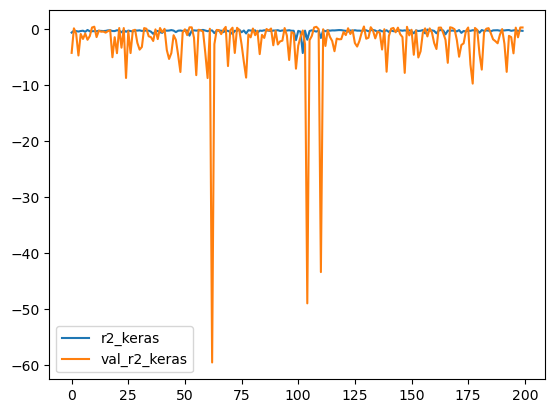

In [166]:
df_hist[["r2_keras", "val_r2_keras"]].plot()

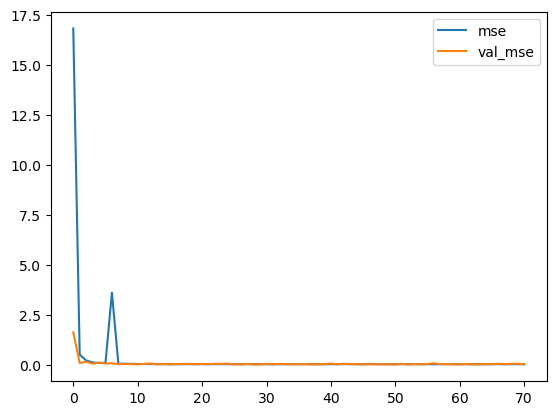

In [153]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.legend()

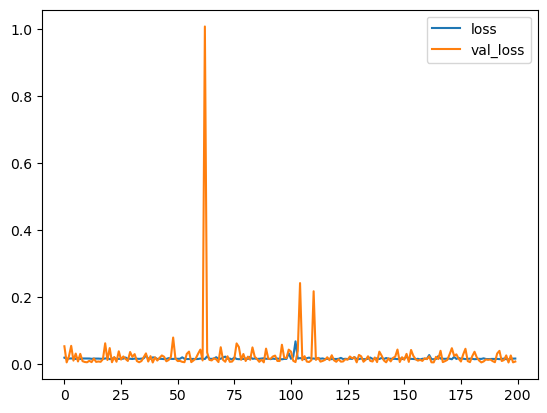

In [174]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### 검증해보기

In [167]:
y_pred = model.predict(X_valid)
y_pred[:5]

27/27 [==============================] - 7s 10ms/step


array([[4.4844875],
       [4.4844875],
       [4.6781597],
       [4.23363  ],
       [4.7401023]], dtype=float32)

In [168]:
y_pred = y_pred.flatten()
y_pred[:5]

array([4.4844875, 4.4844875, 4.6781597, 4.23363  , 4.7401023],
      dtype=float32)

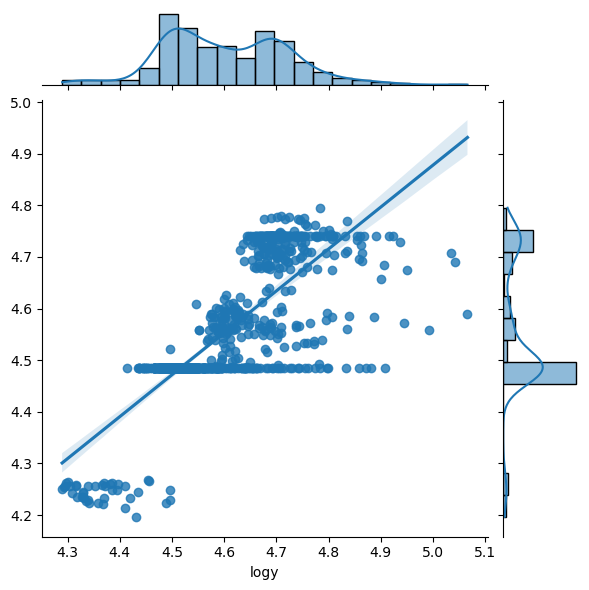

In [169]:
_ = sns.jointplot(x=y_valid, y=y_pred, kind="reg")

In [173]:
loss , r2_kscore = model.evaluate(X_valid, y_valid)
loss , r2_kscore

27/27 [==============================] - 2s 11ms/step - loss: 0.0092 - r2_keras: 0.3615


(0.00921268854290247, 0.3615000545978546)

In [171]:
from sklearn.metrics import r2_score

r2score = r2_score(y_valid, y_pred)
r2score

0.3735956632914802

### 제출해보기

In [176]:
set(X_test.columns) - set(X_train.columns)

set()

In [178]:
prediction = model.predict(X_test)
prediction[:5]

132/132 [==============================] - 8s 11ms/step


array([[4.2424545],
       [4.4844875],
       [4.2341166],
       [4.248581 ],
       [4.6774096]], dtype=float32)

In [179]:
prediction = prediction.flatten()
prediction[:5]

array([4.2424545, 4.4844875, 4.2341166, 4.248581 , 4.6774096],
      dtype=float32)

In [180]:
np.exp(prediction)

array([ 69.57842 ,  88.631516,  69.000694, ...,  88.631516, 114.49759 ,
        88.631516], dtype=float32)

In [182]:
submission["y"] = np.exp(prediction)
submission[:5]

,y
ID,
1,69.578423
2,88.631516
3,69.000694
4,70.005997
5,107.491264


In [187]:
submission.to_csv(f"../data/benz/dnn{r2score}.csv")

In [189]:
pd.read_csv(f"../data/benz/dnn{r2score}.csv")

,ID,y
0,1,69.578420
1,2,88.631516
2,3,69.000694
3,4,70.006000
4,5,107.491264
...,...,...
4204,8410,97.053154
4205,8411,88.631516
4206,8413,88.631516
4207,8414,114.497590


- 결과 : private :0.324, publict : 0.373